In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
IMAGE_SIZE = 256
CHANNELS = 3

In [4]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
         save_to_dir="AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [5]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.5018891  0.49012443 0.5646342 ]
  [0.49263167 0.48086697 0.5553768 ]
  [0.48337424 0.47160953 0.54611933]
  ...
  [0.70700604 0.6991629  0.7851265 ]
  [0.67696583 0.6693956  0.7509299 ]
  [0.71168315 0.7077616  0.7783498 ]]

 [[0.47304428 0.46127957 0.5357894 ]
  [0.47794527 0.46618056 0.54069036]
  [0.4828463  0.47108158 0.54559135]
  ...
  [0.70210505 0.6942619  0.77968097]
  [0.6818669  0.67484117 0.7547418 ]
  [0.7160396  0.712118   0.78270626]]

 [[0.5355806  0.5238159  0.59832567]
  [0.5257786  0.5140139  0.5885237 ]
  [0.5159766  0.5042119  0.5787217 ]
  ...
  [0.69720405 0.6893609  0.77423537]
  [0.6867679  0.6802867  0.7585536 ]
  [0.72039604 0.7164745  0.7870627 ]]

 ...

 [[0.46326184 0.4554187  0.51032066]
  [0.5229306  0.5150875  0.56998944]
  [0.5644354  0.5565923  0.61149424]
  ...
  [0.6392157  0.63529414 0.69803923]
  [0.6392157  0.63529414 0.69803923]
  [0.6392157  0.63529414 0.69803923]]

 [[0.48885593 0.4810128  0.5359148 ]
  [0.52238613 0.514543   0.56944495]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.61143976 0.5683025  0.5839888 ]
  [0.61069125 0.567554   0.5832403 ]
  [0.60994273 0.5668055  0.58249176]
  ...
  [0.5005411  0.4534823  0.46132544]
  [0.43323705 0.38617823 0.39402136]
  [0.4480338  0.40097496 0.4088181 ]]

 [[0.6154774  0.5723401  0.58802634]
  [0.6171615  0.57402426 0.58971053]
  [0.61884564 0.5757084  0.59139466]
  ...
  [0.5016639  0.45460507 0.4624482 ]
  [0.42874593 0.3816871  0.38953024]
  [0.45027936 0.40322053 0.41106367]]

 [[0.6113808  0.56824356 0.58392984]
  [0.60651547 0.5633782  0.5790645 ]
  [0.6016501  0.55851287 0.57419914]
  ...
  [0.50278664 0.45572785 0.46357098]
  [0.42425483 0.377196   0.38503915]
  [0.4525249  0.40546608 0.41330922]]

 ...

 [[0.70273304 0.6792036  0.6948899 ]
  [0.68183255 0.65830314 0.6739894 ]
  [0.6789473  0.6554179  0.6711042 ]
  ...
  [0.5457179  0.5182669  0.5457179 ]
  [0.54309803 0.51564705 0.54309803]
  [0.5404782  0.51302725 0.5404782 ]]

 [[0.70161027 0.67808086 0.69376713]
  [0.68164545 0.65811604 0.6738023 ]


In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 218s 5s/step - loss: 0.9004 - accuracy: 0.4973 - val_loss: 0.8643 - val_accuracy: 0.5573
Epoch 2/20
47/47 [==============================] - 231s 5s/step - loss: 0.8118 - accuracy: 0.5855 - val_loss: 0.6286 - val_accuracy: 0.7656
Epoch 3/20
47/47 [==============================] - 214s 5s/step - loss: 0.5493 - accuracy: 0.7877 - val_loss: 0.4434 - val_accuracy: 0.8021
Epoch 4/20
47/47 [==============================] - 208s 4s/step - loss: 0.4533 - accuracy: 0.8304 - val_loss: 0.4012 - val_accuracy: 0.8333
Epoch 5/20
47/47 [==============================] - 205s 4s/step - loss: 0.3800 - accuracy: 0.8541 - val_loss: 0.5340 - val_accuracy: 0.7865
Epoch 6/20
47/47 [==============================] - 202s 4s/step - loss: 0.3436 - accuracy: 0.8575 - val_loss: 0.2963 - val_accuracy: 0.8854
Epoch 7/20
47/47 [==============================] - 205s 4s/step - loss: 0.2480 - accuracy: 0.9138 - val_loss: 0.2394 - val_accuracy: 0.8750
Epoch 8/20
47

In [16]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 14s 1s/step - loss: 0.1458 - accuracy: 0.9536


In [17]:
scores


[0.14581298828125, 0.953596293926239]

In [18]:
history

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

20

In [23]:
history.history['loss'][:5]

[0.9004397988319397,
 0.811836838722229,
 0.5493195056915283,
 0.4533052146434784,
 0.3799520432949066]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc


[0.5572916865348816,
 0.765625,
 0.8020833134651184,
 0.8333333134651184,
 0.7864583134651184,
 0.8854166865348816,
 0.875,
 0.875,
 0.921875,
 0.8958333134651184,
 0.9166666865348816,
 0.90625,
 0.9270833134651184,
 0.9375,
 0.9479166865348816,
 0.9375,
 0.9583333134651184,
 0.8958333134651184,
 0.9322916865348816,
 0.953125]

In [26]:
acc

[0.49728628993034363,
 0.5854817032814026,
 0.7876526713371277,
 0.8303934931755066,
 0.8541383743286133,
 0.8575305342674255,
 0.9138398766517639,
 0.9084124565124512,
 0.9240162968635559,
 0.9111261963844299,
 0.9206241369247437,
 0.9518317580223083,
 0.9457259178161621,
 0.9504749178886414,
 0.9355494976043701,
 0.9620081186294556,
 0.9477611780166626,
 0.9721845388412476,
 0.9654002785682678,
 0.9525101780891418]

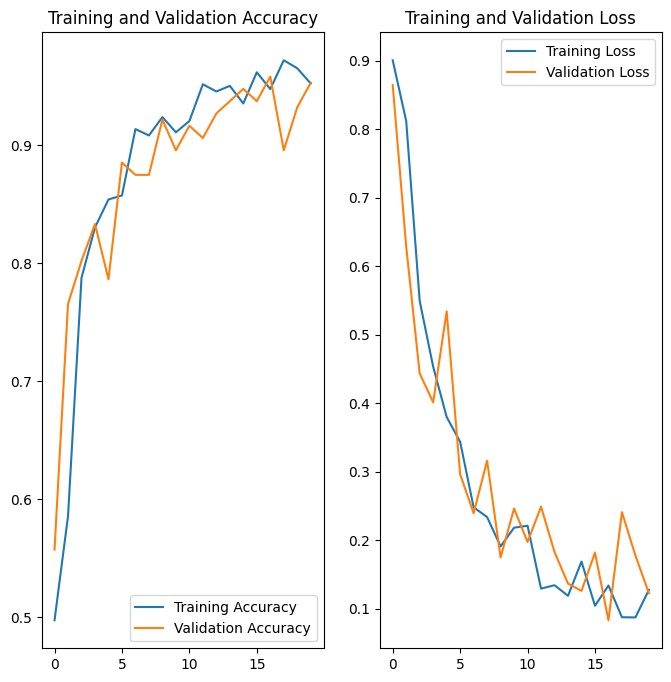

In [27]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 1s 523ms/step
predicted label: Potato___Early_blight


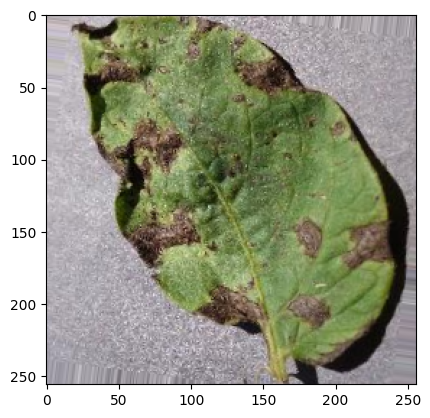

In [30]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


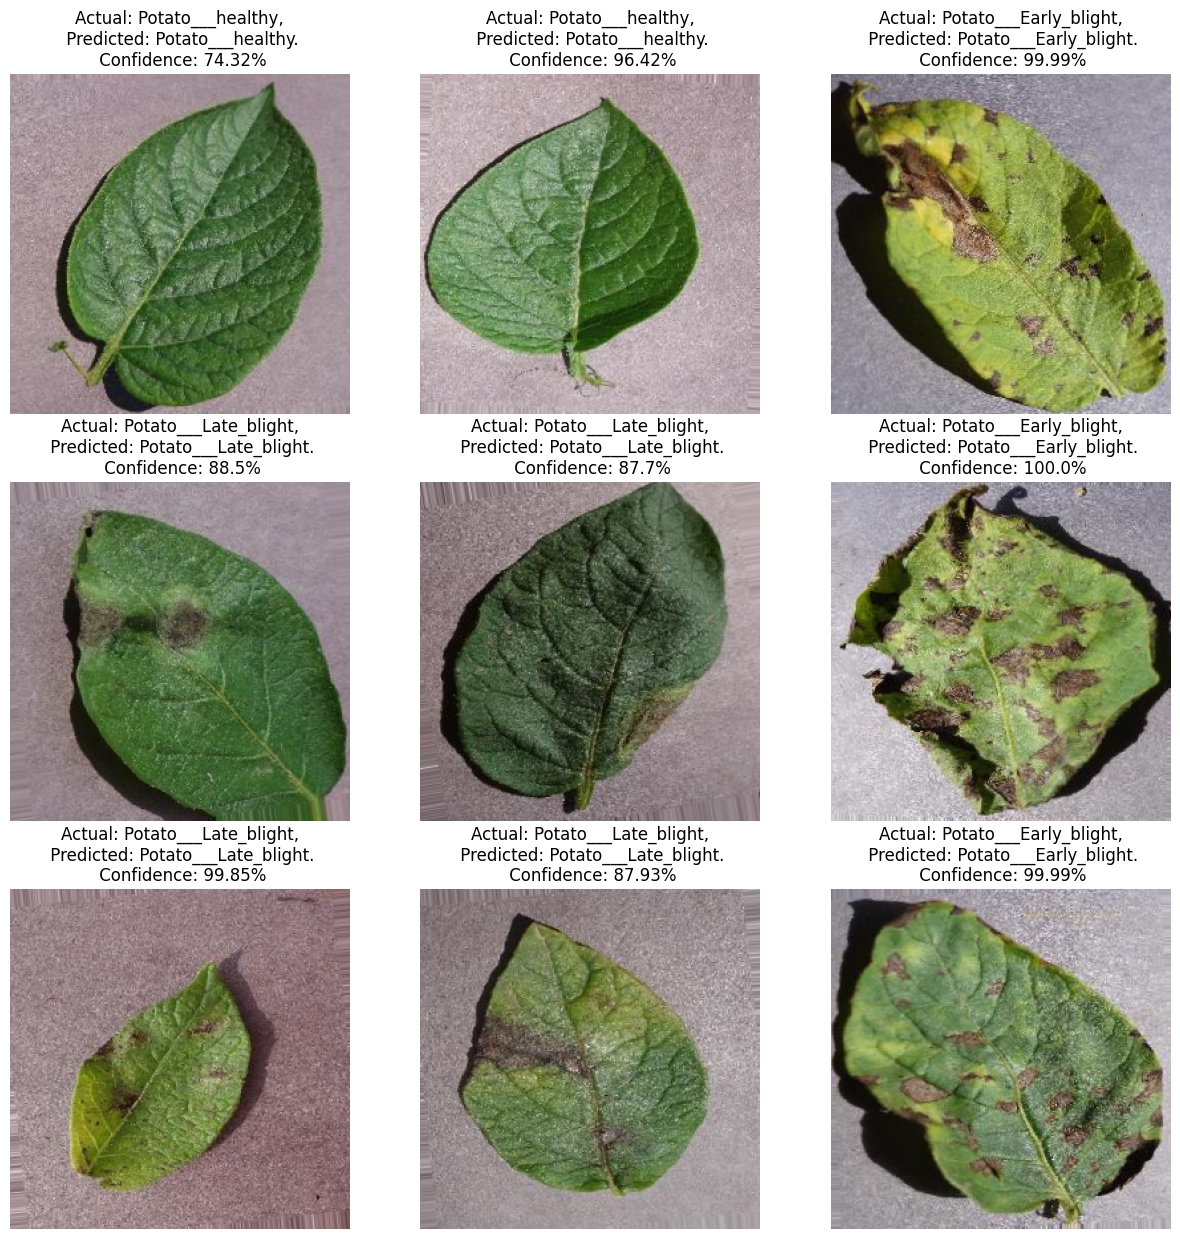

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [33]:
model.save("../potatoes1.h5")